# 문제들

1. naver finance에서 코스피 200의 리스트를 받아라

2. 2022년 코스피 200의 1월 ~3월까지의 주가를 모두 받아라

3. 그들을 DataFrame화 하여 각각에 대해 기술적 분석, MA, MACD, RSI를 구하라

4. 이들을 csv로 만들어서 코드와 csv 200개를 알집으로 제출해라

인터넷 활용 가능 (출처 주석 표시, 주석은 #로 진행), 친구와 상의 불가능.

# 문제 1

In [50]:
import csv

In [51]:
import requests
from bs4 import BeautifulSoup
url = "https://finance.naver.com/sise/entryJongmok.naver?&page=1"
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36","Accept-Language": "ko-KR,ko;q=0.8,en-US;q=0.5,en;q=0.3"}
res = requests.get(url, headers= headers)
res.raise_for_status()

soup = BeautifulSoup(res.text, "lxml")

#나도코딩 유튜브 웹스크래핑

In [52]:
soup

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>네이버 금융</title>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20221123095624/css/newstock.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20221123095624/css/common.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20221123095624/css/layout.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20221123095624/css/main.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20221123095624/css/newstock2.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20221123095624/css/newstock3.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20221123095624/css/world.css" rel="styleshee

In [53]:
stock = soup.find_all("td",attrs={"class":"ctg"})

In [54]:
stock

[<td class="ctg"><a href="/item/main.naver?code=005930" target="_parent">삼성전자</a></td>,
 <td class="ctg"><a href="/item/main.naver?code=373220" target="_parent">LG에너지솔루션</a></td>,
 <td class="ctg"><a href="/item/main.naver?code=207940" target="_parent">삼성바이오로직스</a></td>,
 <td class="ctg"><a href="/item/main.naver?code=000660" target="_parent">SK하이닉스</a></td>,
 <td class="ctg"><a href="/item/main.naver?code=051910" target="_parent">LG화학</a></td>,
 <td class="ctg"><a href="/item/main.naver?code=006400" target="_parent">삼성SDI</a></td>,
 <td class="ctg"><a href="/item/main.naver?code=005380" target="_parent">현대차</a></td>,
 <td class="ctg"><a href="/item/main.naver?code=035420" target="_parent">NAVER</a></td>,
 <td class="ctg"><a href="/item/main.naver?code=000270" target="_parent">기아</a></td>,
 <td class="ctg"><a href="/item/main.naver?code=035720" target="_parent">카카오</a></td>]

In [55]:
for x in stock :
    print(x.get_text())

삼성전자
LG에너지솔루션
삼성바이오로직스
SK하이닉스
LG화학
삼성SDI
현대차
NAVER
기아
카카오


In [56]:
for i in range(1,21) :
    url = "https://finance.naver.com/sise/entryJongmok.naver?&page={}".format(i)
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36","Accept-Language": "ko-KR,ko;q=0.8,en-US;q=0.5,en;q=0.3"}
    res = requests.get(url, headers= headers)
    res.raise_for_status()

    soup = BeautifulSoup(res.text, "lxml")
    stock = soup.find_all("td",attrs={"class":"ctg"})
    
    for x in stock :
        temp = x.get_text()
        stock_list = []
        stock_list.append(temp)
        print(stock_list)

['삼성전자']
['LG에너지솔루션']
['삼성바이오로직스']
['SK하이닉스']
['LG화학']
['삼성SDI']
['현대차']
['NAVER']
['기아']
['카카오']
['POSCO홀딩스']
['셀트리온']
['삼성물산']
['KB금융']
['현대모비스']
['신한지주']
['포스코케미칼']
['SK이노베이션']
['LG전자']
['SK']
['삼성생명']
['하나금융지주']
['KT&G']
['LG']
['한국전력']
['카카오뱅크']
['고려아연']
['SK텔레콤']
['HMM']
['LG생활건강']
['두산에너빌리티']
['엔씨소프트']
['현대중공업']
['삼성전기']
['크래프톤']
['KT']
['S-Oil']
['삼성에스디에스']
['한화솔루션']
['삼성화재']
['우리금융지주']
['대한항공']
['기업은행']
['아모레퍼시픽']
['LG이노텍']
['카카오페이']
['현대글로비스']
['SK바이오사이언스']
['하이브']
['롯데케미칼']
['F&F']
['CJ제일제당']
['SK바이오팜']
['메리츠화재']
['강원랜드']
['LG유플러스']
['한국조선해양']
['SK스퀘어']
['LG디스플레이']
['메리츠금융지주']
['HD현대']
['넷마블']
['삼성엔지니어링']
['한온시스템']
['한국항공우주']
['오리온']
['SK아이이테크놀로지']
['현대제철']
['삼성중공업']
['GS']
['현대건설']
['코웨이']
['DB손해보험']
['유한양행']
['금호석유']
['SKC']
['한국타이어앤테크놀로지']
['미래에셋증권']
['메리츠증권']
['삼성카드']
['한화에어로스페이스']
['두산밥캣']
['BGF리테일']
['롯데지주']
['에스디바이오센서']
['현대로템']
['현대미포조선']
['한국금융지주']
['NH투자증권']
['삼성증권']
['한국가스공사']
['씨에스윈드']
['한미약품']
['GS리테일']
['쌍용C&E']
['호텔신라']
['팬오션']
['포스코인터내셔널']
['일진머티리얼즈']
['제일기획'

In [59]:
import csv
import requests
from bs4 import BeautifulSoup
        
filename = "코스피 200 주종.csv"
f = open(filename, "w", encoding ="utf-8-sig", newline="")
writer = csv.writer(f)


for i in range(1,21) :
    url = "https://finance.naver.com/sise/entryJongmok.naver?&page={}".format(i)
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36","Accept-Language": "ko-KR,ko;q=0.8,en-US;q=0.5,en;q=0.3"}
    res = requests.get(url, headers= headers)
    res.raise_for_status()

    soup = BeautifulSoup(res.text, "lxml")
    stock = soup.find_all("td",attrs={"class":"ctg"})
    
    for x in stock :
        temp = x.get_text()
        stock_list = []
        stock_list.append(temp)
        #print(stock_list)
        writer.writerow(stock_list)
f.close()


# 문제 2

2. 2022년 코스피 200의 1월 ~3월까지의 주가를 모두 받아라

In [2]:
import requests
from bs4 import BeautifulSoup
url = "https://finance.naver.com/sise/sise_index_day.naver?code=KPI200&page=28"
headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36","Accept-Language": "ko-KR,ko;q=0.8,en-US;q=0.5,en;q=0.3"}
res = requests.get(url, headers= headers)
res.raise_for_status()

soup = BeautifulSoup(res.text, "lxml")

In [9]:
date_ = soup.find_all("td", attrs={"class":"date"})
print(date_)

[<td class="date">2022.04.04</td>, <td class="date">2022.04.01</td>, <td class="date">2022.03.31</td>, <td class="date">2022.03.30</td>, <td class="date">2022.03.29</td>, <td class="date">2022.03.28</td>]


In [10]:
date_ = soup.find_all("td", attrs={"class":"date"})[0]

In [11]:
date_.get_text()

'2022.04.04'

In [12]:
for i in range (6) :
    date_ = soup.find_all("td", attrs={"class":"date"})[i]
    date_str = date_.get_text()
    print(date_str)
    

2022.04.04
2022.04.01
2022.03.31
2022.03.30
2022.03.29
2022.03.28


In [13]:
type(date_str)

str

In [14]:
date_str

'2022.03.28'

In [18]:
import datetime as dt
for i in range (6) :
    date_ = soup.find_all("td", attrs={"class":"date"})[i]
    date_str = date_.get_text()
    yyyy = int(date_str.split('.')[0]) 
    mm = int(date_str.split('.')[1])
    dd = int(date_str.split('.')[2])
    this_date= dt.date(yyyy, mm, dd)
    print(this_date)


    
    

2022-04-04
2022-04-01
2022-03-31
2022-03-30
2022-03-29
2022-03-28


In [7]:
#데이트 str이니까 이걸 날짜형식으로 바꿔서 원하는 날짜만 검색 -> 연관된 종가까지 출력하기

In [40]:
len(date_)

1

In [43]:
#체결가 추출 [] 안의 idx가 0,4,8 이렇게 4씩 증가되어야 추출됨
price = soup.find_all("td", attrs={"class":"number_1"})[0]
for x in price : 
    print(x.get_text())

364.94


In [8]:
from datetime import datetime

In [63]:
for i in range(6) :
    price = soup.find_all("td", attrs={"class":"number_1"})[i*4]
    for x in price : 
        price_= x.get_text()
        
        

In [4]:
import csv
import requests
from bs4 import BeautifulSoup

filename = "코스피일별종가.csv"
f = open(filename, "w", encoding ="utf-8-sig", newline="")
writer = csv.writer(f)
writer.writerow(("날짜","종가"))

for i in range(28,100) : #날짜 지날 수록 페이지가 뒤로 밀림-> 범위 크게 잡음, 11-28일 기준 28p에 3월 30일 존재
    url = "https://finance.naver.com/sise/sise_index_day.naver?code=KPI200&page={}".format(i)
    headers = {"User-Agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/84.0.4147.89 Safari/537.36","Accept-Language": "ko-KR,ko;q=0.8,en-US;q=0.5,en;q=0.3"}
    res = requests.get(url, headers= headers)
    res.raise_for_status()

    soup = BeautifulSoup(res.text, "lxml")
    
    
    date_ = soup.find_all("td", attrs={"class":"date"})
    import datetime as dt
    for i in range (len(date_)) :
        date_str = date_[i].get_text()
        yyyy = int(date_str.split('.')[0]) 
        mm = int(date_str.split('.')[1])
        dd = int(date_str.split('.')[2])
        this_date= dt.date(yyyy, mm, dd)
        str_this_date = str(this_date)
    
        
        price = soup.find_all("td", attrs={"class":"number_1"})[i*4]
        for x in price : 
            this_price = x.get_text()
        
        if str_this_date[0:7] == '2022-01' :

            writer.writerow((str_this_date,this_price))
            #print(month1_date,month1_price)
        elif str_this_date[0:7] == '2022-02' :
            #print(month2_date,month2_price)
            writer.writerow((str_this_date,this_price))
        elif str_this_date[0:7] == '2022-03' :
            #print(month3_date,month3_price)
            writer.writerow((str_this_date,this_price))
#         months_date=[]
#         months_date.append(month1_date,month2_date,month3_date)
#         months_price=[]
#         months_price.append(month1_price,month2_price,month3_price)
        
        
f.close()

In [1]:
#-----------------------------------------------------------------------------------------------------------------------------#

# 문제 3

3. 그들을 DataFrame화 하여 각각에 대해 기술적 분석, MA, MACD, RSI를 구하라

# 기술적분석

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pd

<module 'pandas' from 'C:\\Users\\hop09\\Desktop\\anaconda\\lib\\site-packages\\pandas\\__init__.py'>

In [6]:
MA_ = pd.read_csv('코스피일별종가.csv')
print('titanic 변수 type:',type(MA_))

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


In [26]:
MA_.describe()

,종가,5일평균종가,단기MA,장기MA,MACD
count,59.000000,55.000000,48.000000,34.000000,34.000000
mean,368.322542,367.543164,366.245000,365.338156,-3.713426
std,12.527796,11.252302,9.051549,5.282165,3.821110
min,348.580000,353.668000,356.947500,360.008077,-12.809615
25%,361.145000,360.139000,359.930417,361.233846,-4.330256
50%,363.770000,363.600000,363.780833,362.724615,-3.249231
75%,373.825000,368.819000,366.742500,369.141154,-1.282468
max,395.510000,391.674000,389.565833,377.119615,2.202756


# MA

In [3]:
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
pd

<module 'pandas' from 'C:\\Users\\hop09\\Desktop\\anaconda\\lib\\site-packages\\pandas\\__init__.py'>

In [6]:
MA_ = pd.read_csv('코스피일별종가.csv')
print('titanic 변수 type:',type(MA_))

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


In [7]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

pd

MA_ = pd.read_csv('코스피일별종가.csv')
print('titanic 변수 type:',type(MA_))MA_ = pd.DataFrame(MA_)

In [8]:
#날짜 빠른 순으로 정렬
MA_ =MA_[::-1]

In [10]:
#문자열을 float으로 변경
#https://m.blog.naver.com/life4happy/222474052209
MA_.astype({"종가":"float"}).dtypes

날짜     object
종가    float64
dtype: object

In [11]:
# MA5 = pd.DataFrame(MA_['종가'].rolling(window=5).mean())
# MA_.insert(len(MA_.columns), '5일', MA5)
# #https://m.blog.naver.com/sssrew1/221841205001

In [12]:
ma5 = pd.DataFrame(MA_['종가'].rolling(window = 5).mean())
MA_['5일평균종가'] = ma5


In [13]:
MA_

,날짜,종가,5일평균종가
58,2022-01-03,395.51,NaN
57,2022-01-04,395.40,NaN
56,2022-01-05,390.39,NaN
55,2022-01-06,386.22,NaN
54,2022-01-07,390.85,391.674
53,2022-01-10,387.52,390.076
52,2022-01-11,388.97,388.790
51,2022-01-12,394.66,389.644
50,2022-01-13,393.00,391.000
49,2022-01-14,387.45,390.320


In [14]:
#인덱스 제거
new_MA=MA_.set_index("날짜")

<AxesSubplot:xlabel='날짜'>

C:\Users\hop09\Desktop\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hop09\Desktop\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


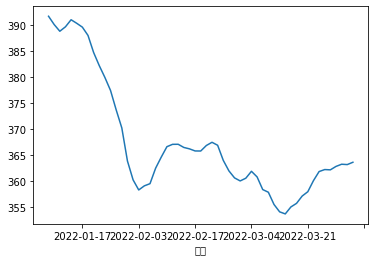

In [16]:
new_MA["5일평균종가"].plot()

# MACD

In [17]:
#단기MA, 장기 MA 구하기 단기는 12일, 장기는 26일로 구함
ma12 = pd.DataFrame(MA_['종가'].rolling(window = 12).mean())
ma26 = pd.DataFrame(MA_['종가'].rolling(window = 26).mean())
MA_['단기MA'] = ma12
MA_['장기MA'] = ma26
#https://ayoteralab.tistory.com/entry/AT-17-MACD-%EC%A7%80%ED%91%9C%EC%97%90-%EB%8C%80%ED%95%9C-%EA%B5%AC%ED%98%84-%EB%B0%8F-%EB%A7%A4%EB%A7%A4%EC%8B%9C%EC%A0%90-%EC%98%88%EC%B8%A1-1

In [18]:
MA_

,날짜,종가,5일평균종가,단기MA,장기MA
58,2022-01-03,395.51,NaN,NaN,NaN
57,2022-01-04,395.40,NaN,NaN,NaN
56,2022-01-05,390.39,NaN,NaN,NaN
55,2022-01-06,386.22,NaN,NaN,NaN
54,2022-01-07,390.85,391.674,NaN,NaN
53,2022-01-10,387.52,390.076,NaN,NaN
52,2022-01-11,388.97,388.790,NaN,NaN
51,2022-01-12,394.66,389.644,NaN,NaN
50,2022-01-13,393.00,391.000,NaN,NaN
49,2022-01-14,387.45,390.320,NaN,NaN


In [19]:
#MACD
macd = ma12 - ma26
MA_['MACD'] = macd

In [20]:
MA_

,날짜,종가,5일평균종가,단기MA,장기MA,MACD
58,2022-01-03,395.51,NaN,NaN,NaN,NaN
57,2022-01-04,395.40,NaN,NaN,NaN,NaN
56,2022-01-05,390.39,NaN,NaN,NaN,NaN
55,2022-01-06,386.22,NaN,NaN,NaN,NaN
54,2022-01-07,390.85,391.674,NaN,NaN,NaN
53,2022-01-10,387.52,390.076,NaN,NaN,NaN
52,2022-01-11,388.97,388.790,NaN,NaN,NaN
51,2022-01-12,394.66,389.644,NaN,NaN,NaN
50,2022-01-13,393.00,391.000,NaN,NaN,NaN
49,2022-01-14,387.45,390.320,NaN,NaN,NaN


In [21]:
new_MACD=MA_.set_index("날짜")

In [22]:
new_MACD

,종가,5일평균종가,단기MA,장기MA,MACD
날짜,,,,,
2022-01-03,395.51,NaN,NaN,NaN,NaN
2022-01-04,395.40,NaN,NaN,NaN,NaN
2022-01-05,390.39,NaN,NaN,NaN,NaN
2022-01-06,386.22,NaN,NaN,NaN,NaN
2022-01-07,390.85,391.674,NaN,NaN,NaN
2022-01-10,387.52,390.076,NaN,NaN,NaN
2022-01-11,388.97,388.790,NaN,NaN,NaN
2022-01-12,394.66,389.644,NaN,NaN,NaN
2022-01-13,393.00,391.000,NaN,NaN,NaN


<AxesSubplot:xlabel='날짜'>

C:\Users\hop09\Desktop\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\hop09\Desktop\anaconda\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


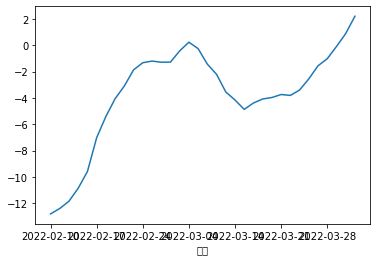

In [23]:
new_MACD["MACD"].plot()

# RSI

In [27]:
import pandas as pd

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
pd

<module 'pandas' from 'C:\\Users\\hop09\\Desktop\\anaconda\\lib\\site-packages\\pandas\\__init__.py'>

In [44]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

pd

MA_ = pd.read_csv('코스피일별종가.csv')
print('titanic 변수 type:',type(MA_))

titanic 변수 type: <class 'pandas.core.frame.DataFrame'>


In [45]:
df = pd.DataFrame(MA_)

In [46]:
df

,날짜,종가
0,2022-03-31,365.61
1,2022-03-30,364.50
2,2022-03-29,363.77
3,2022-03-28,362.06
4,2022-03-25,362.06
5,2022-03-24,363.38
6,2022-03-23,364.84
7,2022-03-22,361.66
8,2022-03-21,358.77
9,2022-03-18,362.33


<AxesSubplot:>

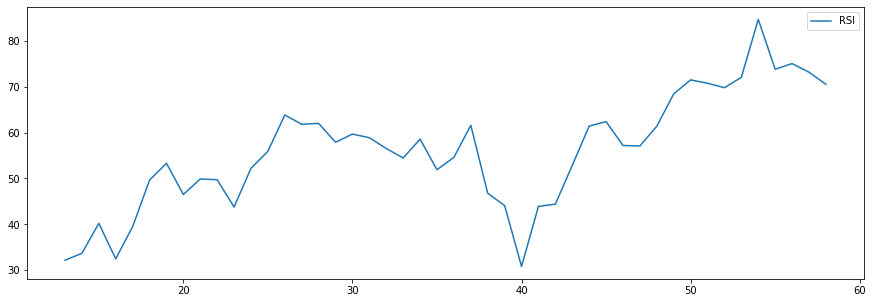

In [47]:
# 상승, 하락분을 알기위해 현재 종가에서 전일 종가를 빼서 데이터프레임에 추가하겠습니다.
RSI_n=14
df["등락"]=[df.loc[i,"종가"]-df.loc[i-1,"종가"] if i>0 else 0 for i in range(len(df))] 
# i가 0일때는 전일값이 없어서 제외함, i는 데이터프레임의 index값
 
# U(up): n일 동안의 종가 상승 분
df["RSI_U"]=df["등락"].apply(lambda x: x if x>0 else 0)
 
# D(down): n일 동안의 종가 하락 분 --> 음수를 양수로 바꿔줌
df["RSI_D"]=df["등락"].apply(lambda x: x * (-1) if x<0 else 0)
 
# AU(average ups): U값의 평균
df["RSI_AU"]=df["RSI_U"].rolling(RSI_n).mean()
 
# DU(average downs): D값의 평균
df["RSI_AD"]=df["RSI_D"].rolling(RSI_n).mean()
 
df["RSI"] = df.apply(lambda x:x["RSI_AU"]/(x["RSI_AU"]+ x["RSI_AD"]) * 100,1)
 
#df[["등락","RSI_U","RSI_D","RSI_AU","RSI_AD","RSI"]].fillna(0, inplace=True)
 
# RSI값이 30 이하일 때 매수, 80 이상일 때 매도하도록 설정해보겠습니다. 
# 좀 더 최적화된 값은 다음 시간에 찾아보께요.
df["RSI_sign"]=df["RSI"].apply(lambda x: "매수" if x<20 else ("매도" if x>80 else "대기"))
 
df[['RSI']].plot.line(subplots=False, figsize=(15,5))

#https://nakyup.tistory.com/7

# 출처

In [ ]:
#나도코딩 유튜브 웹스크래핑
#https://m.blog.naver.com/life4happy/222474052209
# #https://m.blog.naver.com/sssrew1/221841205001
#https://nakyup.tistory.com/7
#https://ayoteralab.tistory.com/entry/AT-17-MACD-%EC%A7%80%ED%91%9C%EC%97%90-%EB%8C%80%ED%95%9C-%EA%B5%AC%ED%98%84-%EB%B0%8F-%EB%A7%A4%EB%A7%A4%EC%8B%9C%EC%A0%90-%EC%98%88%EC%B8%A1-1